In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Load MNIST
(x_train, _), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype("float32") / 255.
x_test = x_test.astype("float32") / 255.

# Flatten images
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
# Define Autoencoder with 2D latent space
input_dim = x_train.shape[1]
encoding_dim = 2

# Encoder
encoder = models.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(encoding_dim)
])

# Decoder
decoder = models.Sequential([
    layers.Input(shape=(encoding_dim,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(input_dim, activation='sigmoid')
])

# Autoencoder = encoder + decoder
autoencoder_input = tf.keras.Input(shape=(input_dim,))
encoded = encoder(autoencoder_input)
decoded = decoder(encoded)
autoencoder = tf.keras.Model(autoencoder_input, decoded)

# Compile and train
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(x_train, x_train, epochs=20, batch_size=256, shuffle=True, validation_data=(x_test, x_test))


Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - loss: 0.0999 - val_loss: 0.0578
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0556 - val_loss: 0.0506
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.0498 - val_loss: 0.0466
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0463 - val_loss: 0.0449
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0449 - val_loss: 0.0437
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - loss: 0.0436 - val_loss: 0.0429
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0429 - val_loss: 0.0423
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0422 - val_loss: 0.0419
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.0417 - val_loss: 0.0414
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - loss: 0.0413 - val_loss: 0.0411
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 0.0409 - val_loss: 0.0407
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


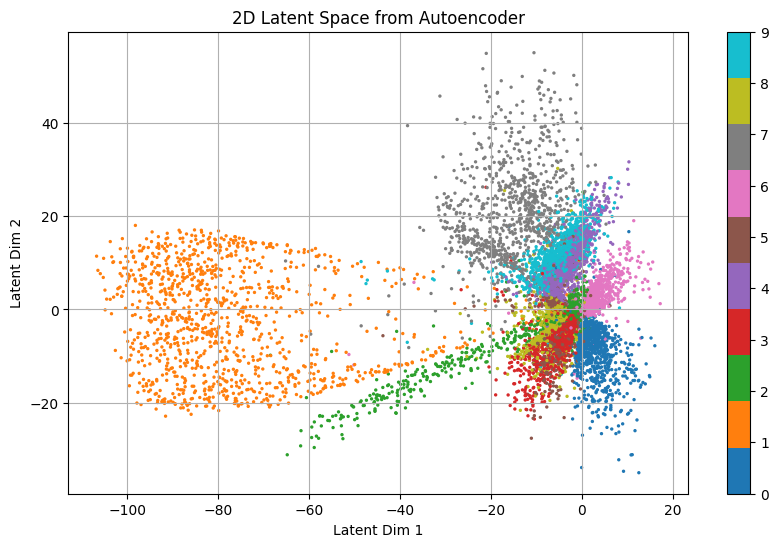

In [3]:
# Project test images to 2D latent space
z_test = encoder.predict(x_test)

# Plot 2D latent space with labels
plt.figure(figsize=(10, 6))
plt.scatter(z_test[:, 0], z_test[:, 1], c=y_test, cmap='tab10', s=2)
plt.colorbar()
plt.title("2D Latent Space from Autoencoder")
plt.xlabel("Latent Dim 1")
plt.ylabel("Latent Dim 2")
plt.grid(True)
plt.show()


In [4]:
# PCA to 2D
pca = PCA(n_components=2)
x_test_pca = pca.fit_transform(x_test)
x_test_reconstructed_pca = pca.inverse_transform(x_test_pca)

# Autoencoder reconstruction
x_test_reconstructed_ae = autoencoder.predict(x_test)

# Compute MSE
ae_mse = mean_squared_error(x_test, x_test_reconstructed_ae)
pca_mse = mean_squared_error(x_test, x_test_reconstructed_pca)

print(f"Autoencoder MSE: {ae_mse:.6f}")
print(f"PCA MSE:         {pca_mse:.6f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
Autoencoder MSE: 0.039264
PCA MSE:         0.055550


In [5]:
# Add noise
noise_factor = 0.3
x_train_noisy = x_train + noise_factor * np.random.normal(size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Retrain on noisy data
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(x_train_noisy, x_train, epochs=10, batch_size=256, validation_data=(x_test_noisy, x_test))


Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - loss: 0.0425 - val_loss: 0.0405
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 0.0401 - val_loss: 0.0401
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.0395 - val_loss: 0.0399
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0392 - val_loss: 0.0398
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0389 - val_loss: 0.0396
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0387 - val_loss: 0.0395
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0384 - val_loss: 0.0395
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0382 - val_loss: 0.0394
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - loss: 0.0380 - val_loss: 0.0394
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0380 - val_loss: 0.0393
